In [10]:
# IMPORTANTE ATTENZIONE OCCORRE CONVERTIRE IL FILE DIINGRESSO DEI PUNTI
# IN COORDINATE PIANE METRICHE 



import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# Import plotly package
import plotly
plotly.tools.set_credentials_file(username='davide.schenone', api_key='WBSgVI0FXgSIRecK2cHU')
import plotly.graph_objs as go

# Check ploltly version
plotly.__version__

# To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py


# Create data with x and y random over [-2, 2], and z a Gaussian function of x and y.
#np.random.seed(12345)
#x = 2 * (np.random.random(500) - 0.5)
#y = 2 * (np.random.random(500) - 0.5)

#def f(x, y):
 #   return np.exp(-(x + y ** 2))

#z = f(x, y)

#imposto i dati
#importa il file originale
#df = pd.read_csv('Saorge_Taggia_erh_erz_prof.csv', sep='\t', names=['y', 'x','z','a','b'])

#importa il file convertito con convergo
#df = pd.read_csv('Saorge_Taggia_erh_erz_prof_GAU-O.csv', sep='\s+', names=['y', 'x','z'])



#importo il file depurato degli outlayer:
df = pd.read_csv('taggia_saorge_ripulita_outlier_max.csv', sep=',', names=['x', 'y','z'])
    
x = df['x']  
    
y = df['y']   
    
z = df['z']



data = np.c_[x,y,z]

# regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
XX = X.flatten()
YY = Y.flatten()
    
# best-fit linear plane (1st-order)
A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
# evaluate it on grid
Z = C[0]*X + C[1]*Y + C[2]
    
# or expressed using matrix/vector product
#Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

# plot points and fitted surface using Matplotlib
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')

# plot points and fitted surface using Plotly
trace1 = go.Scatter3d(
    x=data[:,0],
    y=data[:,1],
    z=data[:,2],
    mode='markers',
    marker=dict(size=4, color='red', line=dict(color='black', width=0.5), opacity=0.85)
)

trace2 = go.Surface(z=Z, x=X, y=Y, colorscale='RdBu', opacity=0.6)

# Package the trace dictionary into a data object
data_test1 = go.Data([trace1, trace2])

# Dictionary of style options for all axes
axis = dict(
    showbackground=True, # show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
)

# Make a layout object
layout = go.Layout(
    title='1st-order (linear) plane', # set plot title
    scene=go.Scene(  # axes are part of a 'scene' in 3d plots
        xaxis=go.XAxis(axis), # set x-axis style
        yaxis=go.YAxis(axis), # set y-axis style
        zaxis=go.ZAxis(axis)),  # set z-axis style
)

# Make a figure object
fig = go.Figure(data=data_test1, layout=layout)

# Send to Plotly and show in notebook
py.iplot(fig, filename='test1')

IOError: File taggia_saorge_ripulita_outlier_max.csv does not exist

In [2]:
print("%f x + %f y + %f = z" % (C[0], C[1], C[2]))

0.015174 x + -0.076156 y + 342864.022350 = z


In [3]:
#ricavo la direzione e l'immersione del piano attraverso l'equazione del piano e i coseni direttori

A=C[0]
B=C[1]
C_=-1
D=C[2]

#calcolo E
E=np.sqrt(A**2 + B**2 + 1)

#calcolo i coseni
cos_a = A/E

cos_b = B/E

cos_cp = C_/E


cos_c = np.cos((np.pi/2) + np.arccos(C_/E))   #controllare se è corretto 

cos_a_deg = (cos_a*180)/np.pi 
cos_b_deg = (cos_b*180)/np.pi 

print(cos_a, cos_b, cos_c, cos_cp, cos_a_deg, cos_b_deg)


(0.015128812373515424, -0.075927753942150858, -0.077420312467287811, -0.99699854323738479, 0.86681709804773133, -4.3503398487930429)


In [4]:
#calcolo la direzione teta del vettore, il coseni direttori danno la direzione del vettore occorrre aggiungere 90°
teta_primo = np.arctan(cos_a/cos_b)   #espresso in radianti
teta_deg = (teta_primo*180)/np.pi 

#calcolo della direzione del piano
teta = teta_deg + 90

#calcolo l'immersione dip angolo tra la verticale e il piano
dip_vert = np.arcsin(-1*cos_c)
dip_deg = (dip_vert*180)/np.pi

#calcolo l'immersione dip
dip = dip_deg



print("teta= %f ; dip= %f" % (teta, dip))

teta= 78.731242 ; dip= 4.440300


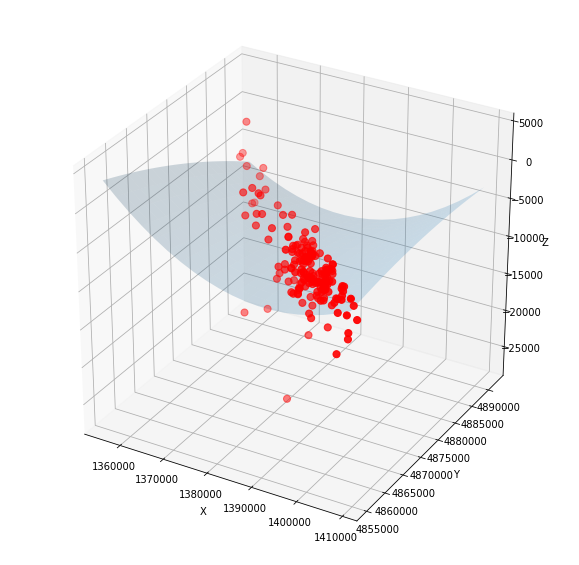

In [5]:
# best-fit quadratic curve (2nd-order)
A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
# evaluate it on a grid
Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface using Matplotlib
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')

# plot points and fitted surface using Plotly
trace3 = go.Surface(
    z=Z,  
    x=X, 
    y=Y,
    colorscale='RdBu',
    opacity=0.999
)

# Package the trace dictionary into a data object
data_test2 = go.Data([trace1, trace3])

# Make a layout object
layout = go.Layout(
    title='2nd-order (quadratic) surface', # set plot title
    scene=go.Scene(  # axes are part of a 'scene' in 3d plots
        xaxis=go.XAxis(axis), # set x-axis style
        yaxis=go.YAxis(axis), # set y-axis style
        zaxis=go.ZAxis(axis)),  # set z-axis style
)

# Make a figure object
fig = go.Figure(data=data_test2, layout=layout)

# Send to Plotly and show in notebook
py.iplot(fig, filename='test2')

In [13]:
z

0      -6000
1      -5200
2      -5690
3      -5470
4      -4270
5      -6070
6     -12200
7      -5820
8      -5730
9      -3760
10     -6000
11     -6070
12     -5200
13     -4800
14     -3960
15     -3610
16     -7970
17     -7280
18     -5620
19     -4490
20     -9360
21     -4630
22     -5890
23     -5070
24     -3320
25     -2350
26     -6000
27     -4490
28     -2260
29     -6000
       ...  
511    -3560
512    -5330
513    -5870
514    -7040
515    -4140
516    -4100
517    -3050
518    -2860
519    -6000
520    -3650
521    -6000
522    -4180
523    -5730
524    -5870
525    -2700
526    -2990
527    -6000
528    -6000
529    -4740
530    -4980
531    -5250
532    -5510
533    -4540
534    -4940
535    -3560
536    -5820
537    -3870
538    -6860
539    -3480
540    -4580
Name: z, dtype: int64